In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import seaborn as sns
import plotnine as gg
from plotnine import *
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Set constants
adult_threshold = 15
pediatric_liquid_tumors = ["Leukemia", "Lymphoma"]

In [3]:
# Set i/o paths and files
data_dir = pathlib.Path("../0.data-download/data")
fig_dir = pathlib.Path("figures")
fig_dir.mkdir(exist_ok=True)

model_input_file = pathlib.Path(f"{data_dir}/Model.csv")
crispr_input_file = pathlib.Path(f"{data_dir}/CRISPRGeneDependency.csv")

model_ouput_age_cleaned_file = pathlib.Path(
    f"{data_dir}/Model_age_column_cleaned.csv"
)
cancer_type_output_figure = pathlib.Path(
    f"{fig_dir}/sample_cancer_types_bar_chart.png"
)
age_category_output_figure = pathlib.Path(
    f"{fig_dir}/age_categories_bar_chart.png"
)

age_distribution_output_figure = pathlib.Path(
    f"{fig_dir}/sample_age_distribution_plot.png"
)

sex_output_figure = pathlib.Path(
    f"{fig_dir}/sample_gender_bar_chart.png"
)


In [4]:
# Load model data
model_df = pd.read_csv(model_input_file)

print(model_df.shape)
model_df.head(3)

(1840, 29)


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,b_cell,NaN,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NSCLC_adenocarcinoma,NaN,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN


In [5]:
# Load dependency data
gene_dependency_df = pd.read_csv(crispr_input_file)

print(gene_dependency_df.shape)
gene_dependency_df.head(3)

(1086, 17387)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.037449,0.080585,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.038768,0.230569,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.017479,0.274568,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412


## Describe input data

In [6]:
# Model.csv visualization
# How many samples from Model.csv?
n_samples_model = len(model_df["DepMap_ID"].unique())
print(f"Number of samples documented in Model.csv: {n_samples_model} \n")

# How many samples from CRISPRGeneDependency.csv?
n_samples_gene = len(gene_dependency_df["DepMap_ID"].unique())
print(f"Number of samples measured in CRISPRGeneDependency.csv: {n_samples_gene} \n")

# Identify which samples are included in both Model.csv and CRISPRGeneDependency.csv
sample_overlap = list(
    set(model_df["DepMap_ID"]) & set(gene_dependency_df["DepMap_ID"])
)

# count the number of samples that overlap in both data sets
print(
    f"Samples measured in both: {len(sample_overlap)} \n"
)

# How many different types of cancer?
n_cancer_types = model_df.query("DepMap_ID in @sample_overlap")["primary_disease"].nunique()
print(f"Number of Cancer Types: \n {n_cancer_types} \n")

Number of samples documented in Model.csv: 1840 

Number of samples measured in CRISPRGeneDependency.csv: 1086 

Samples measured in both: 1086 

Number of Cancer Types: 
 31 



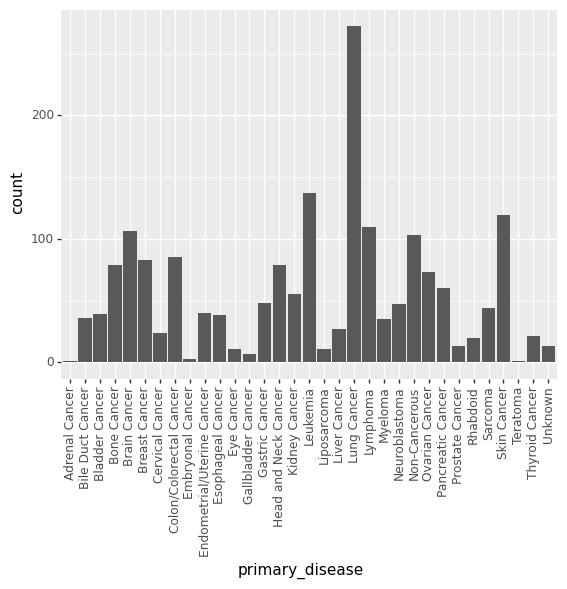

<ggplot: (323070472)>

In [7]:
# Visualize cancer type distribution
cancer_types_bar = (
    gg.ggplot(model_df, gg.aes(x="primary_disease"))
    + gg.geom_bar()
    + gg.theme(axis_text_x=element_text(angle=90))
)

cancer_types_bar.save(cancer_type_output_figure, dpi=500)

cancer_types_bar

## Clean age variable

In [8]:
age_categories = []
age_distribution = []

# Loop through each age entry to clean it
for age_entry in model_df.age.tolist():
    try:
        # If the age is an integer, apply appropriate category
        if int(age_entry) >= adult_threshold:
            age_categories.append("Adult")
        else:
            age_categories.append("Pediatric")

        # If the age is an integer, apply appropriate continuous measure
        age_distribution.append(int(age_entry))

    except ValueError:
        # If conversion fails, categorize appropriately
        if pd.notnull(age_entry):
            age_categories.append(age_entry)
        else:
            age_categories.append("Missing")

        age_distribution.append(np.nan)

In [9]:
# Add columns age_categories & age_distribution
model_df = model_df.assign(
    age_categories=age_categories,
    age_distribution=age_distribution
)

# Output file
model_df.to_csv(model_ouput_age_cleaned_file, index=False)

print(model_df.shape)
model_df.head(3)

(1840, 31)


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues,age_categories,age_distribution
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN,Missing,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN,Pediatric,11.0
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN,Adult,55.0


## Visualize age categories and distribution

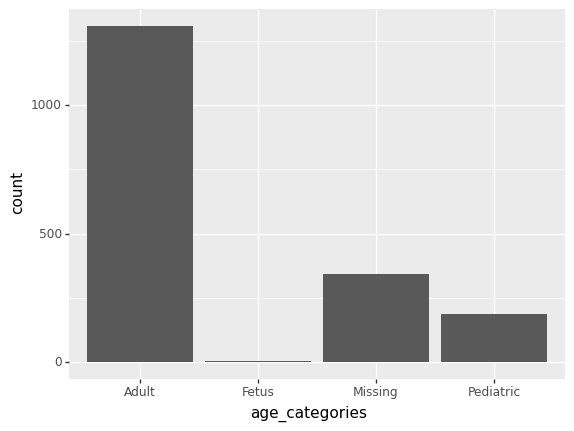

<ggplot: (355901684)>

In [10]:
age_categories_bar = (
    gg.ggplot(model_df, gg.aes(x="age_categories")) + gg.geom_bar()
)

age_categories_bar.save(age_category_output_figure, dpi=500)

age_categories_bar

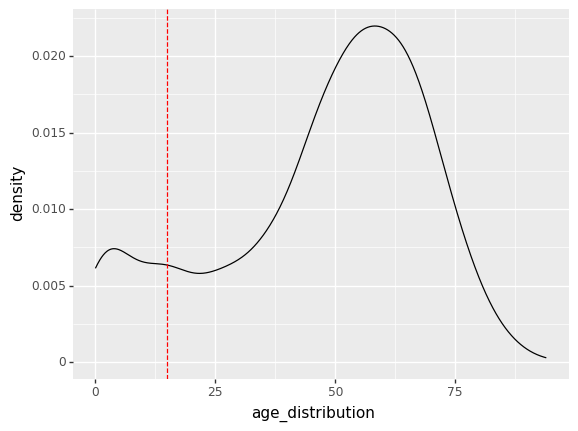

<ggplot: (377517162)>

In [11]:
age_distribution_plot = (
    gg.ggplot(model_df, gg.aes(x="age_distribution"))
    + gg.geom_density()
    + gg.geom_vline(xintercept=adult_threshold, linetype="dashed", color="red")
)

age_distribution_plot.save(age_distribution_output_figure, dpi=500)

age_distribution_plot

In [12]:
pd.DataFrame(age_categories).loc[:, 0].value_counts()

Adult        1308
Missing       341
Pediatric     188
Fetus           3
Name: 0, dtype: int64

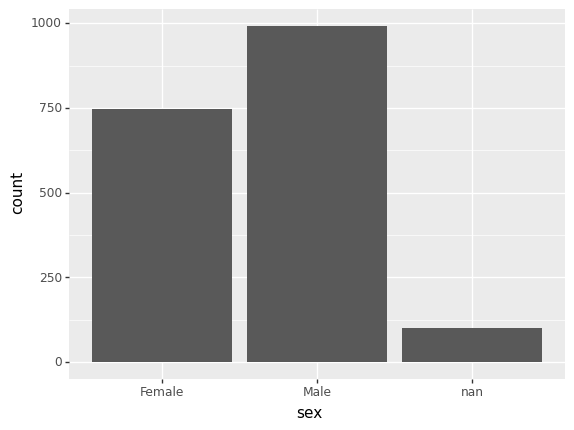

<ggplot: (355909344)>

In [13]:
gendersamp_plot = (
    gg.ggplot(model_df, gg.aes(x="sex")) + gg.geom_bar()
)
    
gendersamp_plot.save(sex_output_figure)

gendersamp_plot

## What cell lines are pediatric cancer?

In [14]:
pediatric_model_df = (
    model_df
    .query("age_categories == 'Pediatric'")
    .query("DepMap_ID in @sample_overlap")
    .reset_index(drop=True)
)

print(pediatric_model_df.shape)
pediatric_model_df.head(3)

(105, 31)


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues,age_categories,age_distribution
0,ACH-000172,TM-87,TM87,TM87_SOFT_TISSUE,TM87,NaN,Male,Academic lab,CVCL_8001,NaN,...,NaN,NaN,NaN,PT-o2d0Va,NaN,Extrarenal rhabdoid tumor,C6586,NaN,Pediatric,1.0
1,ACH-000602,M-07e,M07E,M07E_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_2106,NaN,...,2D: suspension,NaN,NaN,PT-T0am5q,NaN,Childhood acute megakaryoblastic leukemia,C7972,NaN,Pediatric,0.0
2,ACH-001099,KD,KD,KD_SOFT_TISSUE,NaN,NaN,Female,Academic lab,CVCL_U757,NaN,...,NaN,NaN,NaN,PT-FynJTm,NaN,Extrarenal rhabdoid tumor,C6586,NaN,Pediatric,0.0


In [15]:
# What are the neuroblastoma models?
pediatric_model_df.query("Cellosaurus_NCIt_disease == 'Neuroblastoma'").stripped_cell_line_name

5          NGP
7           LS
16     MHHNB11
21      CHP212
23       SKNSH
30       KELLY
31       SKNAS
34       IMR32
35      SKNBE2
36       SKNFI
38       SKNDZ
52         NB1
68      SHSY5Y
75      CHLA15
76     COGN278
77     COGN305
78      NB1643
80       GIMEN
81        LAN2
95        NB69
98      BE2M17
100       NB10
101       NB13
102       NB17
103        NB5
104        NB7
Name: stripped_cell_line_name, dtype: object

In [16]:
# What is the distribution of pediatric tumor types
pediatric_model_df.primary_disease.value_counts()

Neuroblastoma     32
Leukemia          18
Rhabdoid          14
Bone Cancer       12
Sarcoma            8
Brain Cancer       8
Lymphoma           6
Kidney Cancer      2
Eye Cancer         2
Skin Cancer        1
Liver Cancer       1
Ovarian Cancer     1
Name: primary_disease, dtype: int64

In [17]:
# Pediatric solid vs liquid tumors
print("The number of pediatric solid tumors:")
print(
    pediatric_model_df
    .query("primary_disease not in @pediatric_liquid_tumors")
    .primary_disease
    .value_counts()
    .sum()
)
print("The number of pediatric liquid tumors:")
print(
    pediatric_model_df
    .query("primary_disease in @pediatric_liquid_tumors")
    .primary_disease
    .value_counts()
    .sum()
)

The number of pediatric solid tumors:
81
The number of pediatric liquid tumors:
24
